## Object Detection

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import mxnet as mx
import json
import os
from os import listdir, getcwd

In [2]:
# constants

train_path = 'darknet/data/training'
new_train_path = 'darknet/data/ntraining'
test_path = 'darknet/data/testing'
notation_file = 'darknet/data/training/label.idl'
new_notation_file = 'darknet/data/ntraining/nlabel.idl'
width = 640
height = 360

### Definition

In [3]:
# function used in converting label.idl into .txt

def convert_annotation(path, img_id, box):
    classes = {1:0, 2:1, 3:2, 20:3}
    out_f = open(os.path.join(path, '%s.txt'%(img_id)), 'w')
    for box in d:
        x1, y1, x2, y2, cls = box
        dw = 1./width
        dh = 1./height
        # Why dw here? Normalization w = w_box/w_image
        cx = (x2+x1)/2.*dw
        cy = (y2+y1)/2.*dh
        w = (x2-x1)*dw
        h = (y2-y1)*dh
        # Same here, normalization box center cx, cy, and box width, height.
        out_f.write(str(classes[cls]) + " " + " ".join([str(s) for s in [cx, cy, w, h]]) + '\n')
    out_f.close
    
def draw(img_file, boxes):
    classes = {0:"vehicle", 1:"pedestrian", 2:"cyclist", 3:"traffic lights"}
    img = plt.imread("{}".format(img_file))
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for box in boxes:
        x1, y1, x2, y2, cls = box
        rec = patches.Rectangle((x1,y1),x2-x1,y2-y1, 
                                linewidth=1, edgecolor='b', facecolor='none', label=classes[cls])
        ax.add_patch(rec)
        plt.gca().text(x1, y1, '{:s} {:.3f}'.format(classes[cls], 1.0), 
                       bbox=dict(facecolor='red', alpha=0.5), fontsize=8, color='white')
    plt.show()

### Data Augmentation

In [4]:
import os
from DataAugmentation import DataAugmentation

# Mirror, Gaussian blur, Crop. xxx.jpg --> xxx-1.jpg, xxx-2.jpg... xxx-14.jpg
# I.e. Pics for training, num of 10k --> num of 140k. 
data = DataAugmentation(notation_file, train_path, new_train_path)
data.load_notations()
data.new_training_set()

Loading image darknet/data/training/60091.jpg
Loading image darknet/data/training/60092.jpg
Loading image darknet/data/training/60093.jpg
Loading image darknet/data/training/60094.jpg
Loading image darknet/data/training/60095.jpg
Loading image darknet/data/training/60096.jpg
Loading image darknet/data/training/60097.jpg
Loading image darknet/data/training/60098.jpg
Loading image darknet/data/training/60099.jpg
Loading image darknet/data/training/60100.jpg
Loading image darknet/data/training/60101.jpg
Loading image darknet/data/training/60102.jpg
Loading image darknet/data/training/60103.jpg
Loading image darknet/data/training/60104.jpg
Loading image darknet/data/training/60105.jpg
Loading image darknet/data/training/60106.jpg
Loading image darknet/data/training/60107.jpg
Loading image darknet/data/training/60108.jpg
Loading image darknet/data/training/60109.jpg
Loading image darknet/data/training/60110.jpg
Loading image darknet/data/training/60111.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/60270.jpg
Loading image darknet/data/training/60271.jpg
Loading image darknet/data/training/60272.jpg
Loading image darknet/data/training/60273.jpg
Loading image darknet/data/training/60274.jpg
Loading image darknet/data/training/60275.jpg
Loading image darknet/data/training/60276.jpg
Loading image darknet/data/training/60277.jpg
Loading image darknet/data/training/60278.jpg
Loading image darknet/data/training/60279.jpg
Loading image darknet/data/training/60280.jpg
Loading image darknet/data/training/60281.jpg
Loading image darknet/data/training/60282.jpg
Loading image darknet/data/training/60283.jpg
Loading image darknet/data/training/60284.jpg
Loading image darknet/data/training/60285.jpg
Loading image darknet/data/training/60286.jpg
Loading image darknet/data/training/60287.jpg
Loading image darknet/data/training/60288.jpg
Loading image darknet/data/training/60289.jpg
Loading image darknet/data/training/60290.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/60449.jpg
Loading image darknet/data/training/60450.jpg
Loading image darknet/data/training/60451.jpg
Loading image darknet/data/training/60452.jpg
Loading image darknet/data/training/60453.jpg
Loading image darknet/data/training/60454.jpg
Loading image darknet/data/training/60455.jpg
Loading image darknet/data/training/60456.jpg
Loading image darknet/data/training/60457.jpg
Loading image darknet/data/training/60458.jpg
Loading image darknet/data/training/60459.jpg
Loading image darknet/data/training/60460.jpg
Loading image darknet/data/training/60461.jpg
Loading image darknet/data/training/60462.jpg
Loading image darknet/data/training/60463.jpg
Loading image darknet/data/training/60464.jpg
Loading image darknet/data/training/60465.jpg
Loading image darknet/data/training/60466.jpg
Loading image darknet/data/training/60467.jpg
Loading image darknet/data/training/60468.jpg
Loading image darknet/data/training/60469.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/60628.jpg
Loading image darknet/data/training/60629.jpg
Loading image darknet/data/training/60630.jpg
Loading image darknet/data/training/60631.jpg
Loading image darknet/data/training/60632.jpg
Loading image darknet/data/training/60633.jpg
Loading image darknet/data/training/60634.jpg
Loading image darknet/data/training/60635.jpg
Loading image darknet/data/training/60636.jpg
Loading image darknet/data/training/60637.jpg
Loading image darknet/data/training/60638.jpg
Loading image darknet/data/training/60639.jpg
Loading image darknet/data/training/60640.jpg
Loading image darknet/data/training/60641.jpg
Loading image darknet/data/training/60642.jpg
Loading image darknet/data/training/60643.jpg
Loading image darknet/data/training/60644.jpg
Loading image darknet/data/training/60645.jpg
Loading image darknet/data/training/60646.jpg
Loading image darknet/data/training/60647.jpg
Loading image darknet/data/training/60648.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/60807.jpg
Loading image darknet/data/training/60808.jpg
Loading image darknet/data/training/60809.jpg
Loading image darknet/data/training/60810.jpg
Loading image darknet/data/training/60811.jpg
Loading image darknet/data/training/60812.jpg
Loading image darknet/data/training/60813.jpg
Loading image darknet/data/training/60814.jpg
Loading image darknet/data/training/60815.jpg
Loading image darknet/data/training/60816.jpg
Loading image darknet/data/training/60817.jpg
Loading image darknet/data/training/60818.jpg
Loading image darknet/data/training/60819.jpg
Loading image darknet/data/training/60820.jpg
Loading image darknet/data/training/60821.jpg
Loading image darknet/data/training/60822.jpg
Loading image darknet/data/training/60823.jpg
Loading image darknet/data/training/60824.jpg
Loading image darknet/data/training/60825.jpg
Loading image darknet/data/training/60826.jpg
Loading image darknet/data/training/60827.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/60986.jpg
Loading image darknet/data/training/60987.jpg
Loading image darknet/data/training/60988.jpg
Loading image darknet/data/training/60989.jpg
Loading image darknet/data/training/60990.jpg
Loading image darknet/data/training/60991.jpg
Loading image darknet/data/training/60992.jpg
Loading image darknet/data/training/60993.jpg
Loading image darknet/data/training/60994.jpg
Loading image darknet/data/training/60995.jpg
Loading image darknet/data/training/60996.jpg
Loading image darknet/data/training/60997.jpg
Loading image darknet/data/training/60998.jpg
Loading image darknet/data/training/60999.jpg
Loading image darknet/data/training/61000.jpg
Loading image darknet/data/training/61001.jpg
Loading image darknet/data/training/61002.jpg
Loading image darknet/data/training/61003.jpg
Loading image darknet/data/training/61004.jpg
Loading image darknet/data/training/61005.jpg
Loading image darknet/data/training/61006.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/61165.jpg
Loading image darknet/data/training/61166.jpg
Loading image darknet/data/training/61167.jpg
Loading image darknet/data/training/61168.jpg
Loading image darknet/data/training/61169.jpg
Loading image darknet/data/training/61170.jpg
Loading image darknet/data/training/61171.jpg
Loading image darknet/data/training/61172.jpg
Loading image darknet/data/training/61173.jpg
Loading image darknet/data/training/61174.jpg
Loading image darknet/data/training/61175.jpg
Loading image darknet/data/training/61176.jpg
Loading image darknet/data/training/61177.jpg
Loading image darknet/data/training/61178.jpg
Loading image darknet/data/training/61179.jpg
Loading image darknet/data/training/61180.jpg
Loading image darknet/data/training/61181.jpg
Loading image darknet/data/training/61182.jpg
Loading image darknet/data/training/61183.jpg
Loading image darknet/data/training/61184.jpg
Loading image darknet/data/training/61185.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/61344.jpg
Loading image darknet/data/training/61345.jpg
Loading image darknet/data/training/61346.jpg
Loading image darknet/data/training/61347.jpg
Loading image darknet/data/training/61348.jpg
Loading image darknet/data/training/61349.jpg
Loading image darknet/data/training/61350.jpg
Loading image darknet/data/training/61351.jpg
Loading image darknet/data/training/61352.jpg
Loading image darknet/data/training/61353.jpg
Loading image darknet/data/training/61354.jpg
Loading image darknet/data/training/61355.jpg
Loading image darknet/data/training/61356.jpg
Loading image darknet/data/training/61357.jpg
Loading image darknet/data/training/61358.jpg
Loading image darknet/data/training/61359.jpg
Loading image darknet/data/training/61360.jpg
Loading image darknet/data/training/61361.jpg
Loading image darknet/data/training/61362.jpg
Loading image darknet/data/training/61363.jpg
Loading image darknet/data/training/61364.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/61523.jpg
Loading image darknet/data/training/61524.jpg
Loading image darknet/data/training/61525.jpg
Loading image darknet/data/training/61526.jpg
Loading image darknet/data/training/61527.jpg
Loading image darknet/data/training/61528.jpg
Loading image darknet/data/training/61529.jpg
Loading image darknet/data/training/61530.jpg
Loading image darknet/data/training/61531.jpg
Loading image darknet/data/training/61532.jpg
Loading image darknet/data/training/61533.jpg
Loading image darknet/data/training/61534.jpg
Loading image darknet/data/training/61535.jpg
Loading image darknet/data/training/61536.jpg
Loading image darknet/data/training/61537.jpg
Loading image darknet/data/training/61538.jpg
Loading image darknet/data/training/61539.jpg
Loading image darknet/data/training/61540.jpg
Loading image darknet/data/training/61541.jpg
Loading image darknet/data/training/61542.jpg
Loading image darknet/data/training/61543.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/61702.jpg
Loading image darknet/data/training/61703.jpg
Loading image darknet/data/training/61704.jpg
Loading image darknet/data/training/61705.jpg
Loading image darknet/data/training/61706.jpg
Loading image darknet/data/training/61707.jpg
Loading image darknet/data/training/61708.jpg
Loading image darknet/data/training/61709.jpg
Loading image darknet/data/training/61710.jpg
Loading image darknet/data/training/61711.jpg
Loading image darknet/data/training/61712.jpg
Loading image darknet/data/training/61713.jpg
Loading image darknet/data/training/61714.jpg
Loading image darknet/data/training/61715.jpg
Loading image darknet/data/training/61716.jpg
Loading image darknet/data/training/61717.jpg
Loading image darknet/data/training/61718.jpg
Loading image darknet/data/training/61719.jpg
Loading image darknet/data/training/61720.jpg
Loading image darknet/data/training/61721.jpg
Loading image darknet/data/training/61722.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/61881.jpg
Loading image darknet/data/training/61882.jpg
Loading image darknet/data/training/61883.jpg
Loading image darknet/data/training/61884.jpg
Loading image darknet/data/training/61885.jpg
Loading image darknet/data/training/61886.jpg
Loading image darknet/data/training/61887.jpg
Loading image darknet/data/training/61888.jpg
Loading image darknet/data/training/61889.jpg
Loading image darknet/data/training/61890.jpg
Loading image darknet/data/training/61891.jpg
Loading image darknet/data/training/61892.jpg
Loading image darknet/data/training/61893.jpg
Loading image darknet/data/training/61894.jpg
Loading image darknet/data/training/61895.jpg
Loading image darknet/data/training/61896.jpg
Loading image darknet/data/training/61897.jpg
Loading image darknet/data/training/61898.jpg
Loading image darknet/data/training/61899.jpg
Loading image darknet/data/training/61900.jpg
Loading image darknet/data/training/61901.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/62060.jpg
Loading image darknet/data/training/62061.jpg
Loading image darknet/data/training/62062.jpg
Loading image darknet/data/training/62063.jpg
Loading image darknet/data/training/62064.jpg
Loading image darknet/data/training/62065.jpg
Loading image darknet/data/training/62066.jpg
Loading image darknet/data/training/62067.jpg
Loading image darknet/data/training/62068.jpg
Loading image darknet/data/training/62069.jpg
Loading image darknet/data/training/62070.jpg
Loading image darknet/data/training/62071.jpg
Loading image darknet/data/training/62072.jpg
Loading image darknet/data/training/62073.jpg
Loading image darknet/data/training/62074.jpg
Loading image darknet/data/training/62075.jpg
Loading image darknet/data/training/62076.jpg
Loading image darknet/data/training/62077.jpg
Loading image darknet/data/training/62078.jpg
Loading image darknet/data/training/62079.jpg
Loading image darknet/data/training/62080.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/62239.jpg
Loading image darknet/data/training/62240.jpg
Loading image darknet/data/training/62241.jpg
Loading image darknet/data/training/62242.jpg
Loading image darknet/data/training/62243.jpg
Loading image darknet/data/training/62244.jpg
Loading image darknet/data/training/62245.jpg
Loading image darknet/data/training/62246.jpg
Loading image darknet/data/training/62247.jpg
Loading image darknet/data/training/62248.jpg
Loading image darknet/data/training/62249.jpg
Loading image darknet/data/training/62250.jpg
Loading image darknet/data/training/62251.jpg
Loading image darknet/data/training/62252.jpg
Loading image darknet/data/training/62253.jpg
Loading image darknet/data/training/62254.jpg
Loading image darknet/data/training/62255.jpg
Loading image darknet/data/training/62256.jpg
Loading image darknet/data/training/62257.jpg
Loading image darknet/data/training/62258.jpg
Loading image darknet/data/training/62259.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/62418.jpg
Loading image darknet/data/training/62419.jpg
Loading image darknet/data/training/62420.jpg
Loading image darknet/data/training/62421.jpg
Loading image darknet/data/training/62422.jpg
Loading image darknet/data/training/62423.jpg
Loading image darknet/data/training/62424.jpg
Loading image darknet/data/training/62425.jpg
Loading image darknet/data/training/62426.jpg
Loading image darknet/data/training/62427.jpg
Loading image darknet/data/training/62428.jpg
Loading image darknet/data/training/62429.jpg
Loading image darknet/data/training/62430.jpg
Loading image darknet/data/training/62431.jpg
Loading image darknet/data/training/62432.jpg
Loading image darknet/data/training/62433.jpg
Loading image darknet/data/training/62434.jpg
Loading image darknet/data/training/62435.jpg
Loading image darknet/data/training/62436.jpg
Loading image darknet/data/training/62437.jpg
Loading image darknet/data/training/62438.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/62597.jpg
Loading image darknet/data/training/62598.jpg
Loading image darknet/data/training/62599.jpg
Loading image darknet/data/training/62600.jpg
Loading image darknet/data/training/62601.jpg
Loading image darknet/data/training/62602.jpg
Loading image darknet/data/training/62603.jpg
Loading image darknet/data/training/62604.jpg
Loading image darknet/data/training/62605.jpg
Loading image darknet/data/training/62606.jpg
Loading image darknet/data/training/62607.jpg
Loading image darknet/data/training/62608.jpg
Loading image darknet/data/training/62609.jpg
Loading image darknet/data/training/62610.jpg
Loading image darknet/data/training/62611.jpg
Loading image darknet/data/training/62612.jpg
Loading image darknet/data/training/62613.jpg
Loading image darknet/data/training/62614.jpg
Loading image darknet/data/training/62615.jpg
Loading image darknet/data/training/62616.jpg
Loading image darknet/data/training/62617.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/62776.jpg
Loading image darknet/data/training/62777.jpg
Loading image darknet/data/training/62778.jpg
Loading image darknet/data/training/62779.jpg
Loading image darknet/data/training/62780.jpg
Loading image darknet/data/training/62781.jpg
Loading image darknet/data/training/62782.jpg
Loading image darknet/data/training/62783.jpg
Loading image darknet/data/training/62784.jpg
Loading image darknet/data/training/62785.jpg
Loading image darknet/data/training/62786.jpg
Loading image darknet/data/training/62787.jpg
Loading image darknet/data/training/62788.jpg
Loading image darknet/data/training/62789.jpg
Loading image darknet/data/training/62790.jpg
Loading image darknet/data/training/62791.jpg
Loading image darknet/data/training/62792.jpg
Loading image darknet/data/training/62793.jpg
Loading image darknet/data/training/62794.jpg
Loading image darknet/data/training/62795.jpg
Loading image darknet/data/training/62796.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/62955.jpg
Loading image darknet/data/training/62956.jpg
Loading image darknet/data/training/62957.jpg
Loading image darknet/data/training/62958.jpg
Loading image darknet/data/training/62959.jpg
Loading image darknet/data/training/62960.jpg
Loading image darknet/data/training/62961.jpg
Loading image darknet/data/training/62962.jpg
Loading image darknet/data/training/62963.jpg
Loading image darknet/data/training/62964.jpg
Loading image darknet/data/training/62965.jpg
Loading image darknet/data/training/62966.jpg
Loading image darknet/data/training/62967.jpg
Loading image darknet/data/training/62968.jpg
Loading image darknet/data/training/62969.jpg
Loading image darknet/data/training/62970.jpg
Loading image darknet/data/training/62971.jpg
Loading image darknet/data/training/62972.jpg
Loading image darknet/data/training/62973.jpg
Loading image darknet/data/training/62974.jpg
Loading image darknet/data/training/62975.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/63134.jpg
Loading image darknet/data/training/63135.jpg
Loading image darknet/data/training/63136.jpg
Loading image darknet/data/training/63137.jpg
Loading image darknet/data/training/63138.jpg
Loading image darknet/data/training/63139.jpg
Loading image darknet/data/training/63140.jpg
Loading image darknet/data/training/63141.jpg
Loading image darknet/data/training/63142.jpg
Loading image darknet/data/training/63143.jpg
Loading image darknet/data/training/63144.jpg
Loading image darknet/data/training/63145.jpg
Loading image darknet/data/training/63146.jpg
Loading image darknet/data/training/63147.jpg
Loading image darknet/data/training/63148.jpg
Loading image darknet/data/training/63149.jpg
Loading image darknet/data/training/63150.jpg
Loading image darknet/data/training/63151.jpg
Loading image darknet/data/training/63152.jpg
Loading image darknet/data/training/63153.jpg
Loading image darknet/data/training/63154.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/63313.jpg
Loading image darknet/data/training/63314.jpg
Loading image darknet/data/training/63315.jpg
Loading image darknet/data/training/63316.jpg
Loading image darknet/data/training/63317.jpg
Loading image darknet/data/training/63318.jpg
Loading image darknet/data/training/63319.jpg
Loading image darknet/data/training/63320.jpg
Loading image darknet/data/training/63321.jpg
Loading image darknet/data/training/63322.jpg
Loading image darknet/data/training/63323.jpg
Loading image darknet/data/training/63324.jpg
Loading image darknet/data/training/63325.jpg
Loading image darknet/data/training/63326.jpg
Loading image darknet/data/training/63327.jpg
Loading image darknet/data/training/63328.jpg
Loading image darknet/data/training/63329.jpg
Loading image darknet/data/training/63330.jpg
Loading image darknet/data/training/63331.jpg
Loading image darknet/data/training/63332.jpg
Loading image darknet/data/training/63333.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/63492.jpg
Loading image darknet/data/training/63493.jpg
Loading image darknet/data/training/63494.jpg
Loading image darknet/data/training/63495.jpg
Loading image darknet/data/training/63496.jpg
Loading image darknet/data/training/63497.jpg
Loading image darknet/data/training/63498.jpg
Loading image darknet/data/training/63499.jpg
Loading image darknet/data/training/63500.jpg
Loading image darknet/data/training/63501.jpg
Loading image darknet/data/training/63502.jpg
Loading image darknet/data/training/63503.jpg
Loading image darknet/data/training/63504.jpg
Loading image darknet/data/training/63505.jpg
Loading image darknet/data/training/63506.jpg
Loading image darknet/data/training/63507.jpg
Loading image darknet/data/training/63508.jpg
Loading image darknet/data/training/63509.jpg
Loading image darknet/data/training/63510.jpg
Loading image darknet/data/training/63511.jpg
Loading image darknet/data/training/63512.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/63671.jpg
Loading image darknet/data/training/63672.jpg
Loading image darknet/data/training/63673.jpg
Loading image darknet/data/training/63674.jpg
Loading image darknet/data/training/63675.jpg
Loading image darknet/data/training/63676.jpg
Loading image darknet/data/training/63677.jpg
Loading image darknet/data/training/63678.jpg
Loading image darknet/data/training/63679.jpg
Loading image darknet/data/training/63680.jpg
Loading image darknet/data/training/63681.jpg
Loading image darknet/data/training/63682.jpg
Loading image darknet/data/training/63683.jpg
Loading image darknet/data/training/63684.jpg
Loading image darknet/data/training/63685.jpg
Loading image darknet/data/training/63686.jpg
Loading image darknet/data/training/63687.jpg
Loading image darknet/data/training/63688.jpg
Loading image darknet/data/training/63689.jpg
Loading image darknet/data/training/63690.jpg
Loading image darknet/data/training/63691.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/63850.jpg
Loading image darknet/data/training/63851.jpg
Loading image darknet/data/training/63852.jpg
Loading image darknet/data/training/63853.jpg
Loading image darknet/data/training/63854.jpg
Loading image darknet/data/training/63855.jpg
Loading image darknet/data/training/63856.jpg
Loading image darknet/data/training/63857.jpg
Loading image darknet/data/training/63858.jpg
Loading image darknet/data/training/63859.jpg
Loading image darknet/data/training/63860.jpg
Loading image darknet/data/training/63861.jpg
Loading image darknet/data/training/63862.jpg
Loading image darknet/data/training/63863.jpg
Loading image darknet/data/training/63864.jpg
Loading image darknet/data/training/63865.jpg
Loading image darknet/data/training/63866.jpg
Loading image darknet/data/training/63867.jpg
Loading image darknet/data/training/63868.jpg
Loading image darknet/data/training/63869.jpg
Loading image darknet/data/training/63870.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/64029.jpg
Loading image darknet/data/training/64030.jpg
Loading image darknet/data/training/64031.jpg
Loading image darknet/data/training/64032.jpg
Loading image darknet/data/training/64033.jpg
Loading image darknet/data/training/64034.jpg
Loading image darknet/data/training/64035.jpg
Loading image darknet/data/training/64036.jpg
Loading image darknet/data/training/64037.jpg
Loading image darknet/data/training/64038.jpg
Loading image darknet/data/training/64039.jpg
Loading image darknet/data/training/64040.jpg
Loading image darknet/data/training/64041.jpg
Loading image darknet/data/training/64042.jpg
Loading image darknet/data/training/64043.jpg
Loading image darknet/data/training/64044.jpg
Loading image darknet/data/training/64045.jpg
Loading image darknet/data/training/64046.jpg
Loading image darknet/data/training/64047.jpg
Loading image darknet/data/training/64048.jpg
Loading image darknet/data/training/64049.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/64208.jpg
Loading image darknet/data/training/64209.jpg
Loading image darknet/data/training/64210.jpg
Loading image darknet/data/training/64211.jpg
Loading image darknet/data/training/64212.jpg
Loading image darknet/data/training/64213.jpg
Loading image darknet/data/training/64214.jpg
Loading image darknet/data/training/64215.jpg
Loading image darknet/data/training/64216.jpg
Loading image darknet/data/training/64217.jpg
Loading image darknet/data/training/64218.jpg
Loading image darknet/data/training/64219.jpg
Loading image darknet/data/training/64220.jpg
Loading image darknet/data/training/64221.jpg
Loading image darknet/data/training/64222.jpg
Loading image darknet/data/training/64223.jpg
Loading image darknet/data/training/64224.jpg
Loading image darknet/data/training/64225.jpg
Loading image darknet/data/training/64226.jpg
Loading image darknet/data/training/64227.jpg
Loading image darknet/data/training/64228.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/64387.jpg
Loading image darknet/data/training/64388.jpg
Loading image darknet/data/training/64389.jpg
Loading image darknet/data/training/64390.jpg
Loading image darknet/data/training/64391.jpg
Loading image darknet/data/training/64392.jpg
Loading image darknet/data/training/64393.jpg
Loading image darknet/data/training/64394.jpg
Loading image darknet/data/training/64395.jpg
Loading image darknet/data/training/64396.jpg
Loading image darknet/data/training/64397.jpg
Loading image darknet/data/training/64398.jpg
Loading image darknet/data/training/64399.jpg
Loading image darknet/data/training/64400.jpg
Loading image darknet/data/training/64401.jpg
Loading image darknet/data/training/64402.jpg
Loading image darknet/data/training/64403.jpg
Loading image darknet/data/training/64404.jpg
Loading image darknet/data/training/64405.jpg
Loading image darknet/data/training/64406.jpg
Loading image darknet/data/training/64407.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/64566.jpg
Loading image darknet/data/training/64567.jpg
Loading image darknet/data/training/64568.jpg
Loading image darknet/data/training/64569.jpg
Loading image darknet/data/training/64570.jpg
Loading image darknet/data/training/64571.jpg
Loading image darknet/data/training/64572.jpg
Loading image darknet/data/training/64573.jpg
Loading image darknet/data/training/64574.jpg
Loading image darknet/data/training/64575.jpg
Loading image darknet/data/training/64576.jpg
Loading image darknet/data/training/64577.jpg
Loading image darknet/data/training/64578.jpg
Loading image darknet/data/training/64579.jpg
Loading image darknet/data/training/64580.jpg
Loading image darknet/data/training/64581.jpg
Loading image darknet/data/training/64582.jpg
Loading image darknet/data/training/64583.jpg
Loading image darknet/data/training/64584.jpg
Loading image darknet/data/training/64585.jpg
Loading image darknet/data/training/64586.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/64745.jpg
Loading image darknet/data/training/64746.jpg
Loading image darknet/data/training/64747.jpg
Loading image darknet/data/training/64748.jpg
Loading image darknet/data/training/64749.jpg
Loading image darknet/data/training/64750.jpg
Loading image darknet/data/training/64751.jpg
Loading image darknet/data/training/64752.jpg
Loading image darknet/data/training/64753.jpg
Loading image darknet/data/training/64754.jpg
Loading image darknet/data/training/64755.jpg
Loading image darknet/data/training/64756.jpg
Loading image darknet/data/training/64757.jpg
Loading image darknet/data/training/64758.jpg
Loading image darknet/data/training/64759.jpg
Loading image darknet/data/training/64760.jpg
Loading image darknet/data/training/64761.jpg
Loading image darknet/data/training/64762.jpg
Loading image darknet/data/training/64763.jpg
Loading image darknet/data/training/64764.jpg
Loading image darknet/data/training/64765.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/64924.jpg
Loading image darknet/data/training/64925.jpg
Loading image darknet/data/training/64926.jpg
Loading image darknet/data/training/64927.jpg
Loading image darknet/data/training/64928.jpg
Loading image darknet/data/training/64929.jpg
Loading image darknet/data/training/64930.jpg
Loading image darknet/data/training/64931.jpg
Loading image darknet/data/training/64932.jpg
Loading image darknet/data/training/64933.jpg
Loading image darknet/data/training/64934.jpg
Loading image darknet/data/training/64935.jpg
Loading image darknet/data/training/64936.jpg
Loading image darknet/data/training/64937.jpg
Loading image darknet/data/training/64938.jpg
Loading image darknet/data/training/64939.jpg
Loading image darknet/data/training/64940.jpg
Loading image darknet/data/training/64941.jpg
Loading image darknet/data/training/64942.jpg
Loading image darknet/data/training/64943.jpg
Loading image darknet/data/training/64944.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/65103.jpg
Loading image darknet/data/training/65104.jpg
Loading image darknet/data/training/65105.jpg
Loading image darknet/data/training/65106.jpg
Loading image darknet/data/training/65107.jpg
Loading image darknet/data/training/65108.jpg
Loading image darknet/data/training/65109.jpg
Loading image darknet/data/training/65110.jpg
Loading image darknet/data/training/65111.jpg
Loading image darknet/data/training/65112.jpg
Loading image darknet/data/training/65113.jpg
Loading image darknet/data/training/65114.jpg
Loading image darknet/data/training/65115.jpg
Loading image darknet/data/training/65116.jpg
Loading image darknet/data/training/65117.jpg
Loading image darknet/data/training/65118.jpg
Loading image darknet/data/training/65119.jpg
Loading image darknet/data/training/65120.jpg
Loading image darknet/data/training/65121.jpg
Loading image darknet/data/training/65122.jpg
Loading image darknet/data/training/65123.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/65282.jpg
Loading image darknet/data/training/65283.jpg
Loading image darknet/data/training/65284.jpg
Loading image darknet/data/training/65285.jpg
Loading image darknet/data/training/65286.jpg
Loading image darknet/data/training/65287.jpg
Loading image darknet/data/training/65288.jpg
Loading image darknet/data/training/65289.jpg
Loading image darknet/data/training/65290.jpg
Loading image darknet/data/training/65291.jpg
Loading image darknet/data/training/65292.jpg
Loading image darknet/data/training/65293.jpg
Loading image darknet/data/training/65294.jpg
Loading image darknet/data/training/65295.jpg
Loading image darknet/data/training/65296.jpg
Loading image darknet/data/training/65297.jpg
Loading image darknet/data/training/65298.jpg
Loading image darknet/data/training/65299.jpg
Loading image darknet/data/training/65300.jpg
Loading image darknet/data/training/65301.jpg
Loading image darknet/data/training/65302.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/65461.jpg
Loading image darknet/data/training/65462.jpg
Loading image darknet/data/training/65463.jpg
Loading image darknet/data/training/65464.jpg
Loading image darknet/data/training/65465.jpg
Loading image darknet/data/training/65466.jpg
Loading image darknet/data/training/65467.jpg
Loading image darknet/data/training/65468.jpg
Loading image darknet/data/training/65469.jpg
Loading image darknet/data/training/65470.jpg
Loading image darknet/data/training/65471.jpg
Loading image darknet/data/training/65472.jpg
Loading image darknet/data/training/65473.jpg
Loading image darknet/data/training/65474.jpg
Loading image darknet/data/training/65475.jpg
Loading image darknet/data/training/65476.jpg
Loading image darknet/data/training/65477.jpg
Loading image darknet/data/training/65478.jpg
Loading image darknet/data/training/65479.jpg
Loading image darknet/data/training/65480.jpg
Loading image darknet/data/training/65481.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/65640.jpg
Loading image darknet/data/training/65641.jpg
Loading image darknet/data/training/65642.jpg
Loading image darknet/data/training/65643.jpg
Loading image darknet/data/training/65644.jpg
Loading image darknet/data/training/65645.jpg
Loading image darknet/data/training/65646.jpg
Loading image darknet/data/training/65647.jpg
Loading image darknet/data/training/65648.jpg
Loading image darknet/data/training/65649.jpg
Loading image darknet/data/training/65650.jpg
Loading image darknet/data/training/65651.jpg
Loading image darknet/data/training/65652.jpg
Loading image darknet/data/training/65653.jpg
Loading image darknet/data/training/65654.jpg
Loading image darknet/data/training/65655.jpg
Loading image darknet/data/training/65656.jpg
Loading image darknet/data/training/65657.jpg
Loading image darknet/data/training/65658.jpg
Loading image darknet/data/training/65659.jpg
Loading image darknet/data/training/65660.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/65819.jpg
Loading image darknet/data/training/65820.jpg
Loading image darknet/data/training/65821.jpg
Loading image darknet/data/training/65822.jpg
Loading image darknet/data/training/65823.jpg
Loading image darknet/data/training/65824.jpg
Loading image darknet/data/training/65825.jpg
Loading image darknet/data/training/65826.jpg
Loading image darknet/data/training/65827.jpg
Loading image darknet/data/training/65828.jpg
Loading image darknet/data/training/65829.jpg
Loading image darknet/data/training/65830.jpg
Loading image darknet/data/training/65831.jpg
Loading image darknet/data/training/65832.jpg
Loading image darknet/data/training/65833.jpg
Loading image darknet/data/training/65834.jpg
Loading image darknet/data/training/65835.jpg
Loading image darknet/data/training/65836.jpg
Loading image darknet/data/training/65837.jpg
Loading image darknet/data/training/65838.jpg
Loading image darknet/data/training/65839.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/65998.jpg
Loading image darknet/data/training/65999.jpg
Loading image darknet/data/training/66000.jpg
Loading image darknet/data/training/66001.jpg
Loading image darknet/data/training/66002.jpg
Loading image darknet/data/training/66003.jpg
Loading image darknet/data/training/66004.jpg
Loading image darknet/data/training/66005.jpg
Loading image darknet/data/training/66006.jpg
Loading image darknet/data/training/66007.jpg
Loading image darknet/data/training/66008.jpg
Loading image darknet/data/training/66009.jpg
Loading image darknet/data/training/66010.jpg
Loading image darknet/data/training/66011.jpg
Loading image darknet/data/training/66012.jpg
Loading image darknet/data/training/66013.jpg
Loading image darknet/data/training/66014.jpg
Loading image darknet/data/training/66015.jpg
Loading image darknet/data/training/66016.jpg
Loading image darknet/data/training/66017.jpg
Loading image darknet/data/training/66018.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/66177.jpg
Loading image darknet/data/training/66178.jpg
Loading image darknet/data/training/66179.jpg
Loading image darknet/data/training/66180.jpg
Loading image darknet/data/training/66181.jpg
Loading image darknet/data/training/66182.jpg
Loading image darknet/data/training/66183.jpg
Loading image darknet/data/training/66184.jpg
Loading image darknet/data/training/66185.jpg
Loading image darknet/data/training/66186.jpg
Loading image darknet/data/training/66187.jpg
Loading image darknet/data/training/66188.jpg
Loading image darknet/data/training/66189.jpg
Loading image darknet/data/training/66190.jpg
Loading image darknet/data/training/66191.jpg
Loading image darknet/data/training/66192.jpg
Loading image darknet/data/training/66193.jpg
Loading image darknet/data/training/66194.jpg
Loading image darknet/data/training/66195.jpg
Loading image darknet/data/training/66196.jpg
Loading image darknet/data/training/66197.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/66356.jpg
Loading image darknet/data/training/66357.jpg
Loading image darknet/data/training/66358.jpg
Loading image darknet/data/training/66359.jpg
Loading image darknet/data/training/66360.jpg
Loading image darknet/data/training/66361.jpg
Loading image darknet/data/training/66362.jpg
Loading image darknet/data/training/66363.jpg
Loading image darknet/data/training/66364.jpg
Loading image darknet/data/training/66365.jpg
Loading image darknet/data/training/66366.jpg
Loading image darknet/data/training/66367.jpg
Loading image darknet/data/training/66368.jpg
Loading image darknet/data/training/66369.jpg
Loading image darknet/data/training/66370.jpg
Loading image darknet/data/training/66371.jpg
Loading image darknet/data/training/66372.jpg
Loading image darknet/data/training/66373.jpg
Loading image darknet/data/training/66374.jpg
Loading image darknet/data/training/66375.jpg
Loading image darknet/data/training/66376.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/66535.jpg
Loading image darknet/data/training/66536.jpg
Loading image darknet/data/training/66537.jpg
Loading image darknet/data/training/66538.jpg
Loading image darknet/data/training/66539.jpg
Loading image darknet/data/training/66540.jpg
Loading image darknet/data/training/66541.jpg
Loading image darknet/data/training/66542.jpg
Loading image darknet/data/training/66543.jpg
Loading image darknet/data/training/66544.jpg
Loading image darknet/data/training/66545.jpg
Loading image darknet/data/training/66546.jpg
Loading image darknet/data/training/66547.jpg
Loading image darknet/data/training/66548.jpg
Loading image darknet/data/training/66549.jpg
Loading image darknet/data/training/66550.jpg
Loading image darknet/data/training/66551.jpg
Loading image darknet/data/training/66552.jpg
Loading image darknet/data/training/66553.jpg
Loading image darknet/data/training/66554.jpg
Loading image darknet/data/training/66555.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/66714.jpg
Loading image darknet/data/training/66715.jpg
Loading image darknet/data/training/66716.jpg
Loading image darknet/data/training/66717.jpg
Loading image darknet/data/training/66718.jpg
Loading image darknet/data/training/66719.jpg
Loading image darknet/data/training/66720.jpg
Loading image darknet/data/training/66721.jpg
Loading image darknet/data/training/66722.jpg
Loading image darknet/data/training/66723.jpg
Loading image darknet/data/training/66724.jpg
Loading image darknet/data/training/66725.jpg
Loading image darknet/data/training/66726.jpg
Loading image darknet/data/training/66727.jpg
Loading image darknet/data/training/66728.jpg
Loading image darknet/data/training/66729.jpg
Loading image darknet/data/training/66730.jpg
Loading image darknet/data/training/66731.jpg
Loading image darknet/data/training/66732.jpg
Loading image darknet/data/training/66733.jpg
Loading image darknet/data/training/66734.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/66893.jpg
Loading image darknet/data/training/66894.jpg
Loading image darknet/data/training/66895.jpg
Loading image darknet/data/training/66896.jpg
Loading image darknet/data/training/66897.jpg
Loading image darknet/data/training/66898.jpg
Loading image darknet/data/training/66899.jpg
Loading image darknet/data/training/66900.jpg
Loading image darknet/data/training/66901.jpg
Loading image darknet/data/training/66902.jpg
Loading image darknet/data/training/66903.jpg
Loading image darknet/data/training/66904.jpg
Loading image darknet/data/training/66905.jpg
Loading image darknet/data/training/66906.jpg
Loading image darknet/data/training/66907.jpg
Loading image darknet/data/training/66908.jpg
Loading image darknet/data/training/66909.jpg
Loading image darknet/data/training/66910.jpg
Loading image darknet/data/training/66911.jpg
Loading image darknet/data/training/66912.jpg
Loading image darknet/data/training/66913.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/67072.jpg
Loading image darknet/data/training/67073.jpg
Loading image darknet/data/training/67074.jpg
Loading image darknet/data/training/67075.jpg
Loading image darknet/data/training/67076.jpg
Loading image darknet/data/training/67077.jpg
Loading image darknet/data/training/67078.jpg
Loading image darknet/data/training/67079.jpg
Loading image darknet/data/training/67080.jpg
Loading image darknet/data/training/67081.jpg
Loading image darknet/data/training/67082.jpg
Loading image darknet/data/training/67083.jpg
Loading image darknet/data/training/67084.jpg
Loading image darknet/data/training/67085.jpg
Loading image darknet/data/training/67086.jpg
Loading image darknet/data/training/67087.jpg
Loading image darknet/data/training/67088.jpg
Loading image darknet/data/training/67089.jpg
Loading image darknet/data/training/67090.jpg
Loading image darknet/data/training/67091.jpg
Loading image darknet/data/training/67092.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/67251.jpg
Loading image darknet/data/training/67252.jpg
Loading image darknet/data/training/67253.jpg
Loading image darknet/data/training/67254.jpg
Loading image darknet/data/training/67255.jpg
Loading image darknet/data/training/67256.jpg
Loading image darknet/data/training/67257.jpg
Loading image darknet/data/training/67258.jpg
Loading image darknet/data/training/67259.jpg
Loading image darknet/data/training/67260.jpg
Loading image darknet/data/training/67261.jpg
Loading image darknet/data/training/67262.jpg
Loading image darknet/data/training/67263.jpg
Loading image darknet/data/training/67264.jpg
Loading image darknet/data/training/67265.jpg
Loading image darknet/data/training/67266.jpg
Loading image darknet/data/training/67267.jpg
Loading image darknet/data/training/67268.jpg
Loading image darknet/data/training/67269.jpg
Loading image darknet/data/training/67270.jpg
Loading image darknet/data/training/67271.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/67430.jpg
Loading image darknet/data/training/67431.jpg
Loading image darknet/data/training/67432.jpg
Loading image darknet/data/training/67433.jpg
Loading image darknet/data/training/67434.jpg
Loading image darknet/data/training/67435.jpg
Loading image darknet/data/training/67436.jpg
Loading image darknet/data/training/67437.jpg
Loading image darknet/data/training/67438.jpg
Loading image darknet/data/training/67439.jpg
Loading image darknet/data/training/67440.jpg
Loading image darknet/data/training/67441.jpg
Loading image darknet/data/training/67442.jpg
Loading image darknet/data/training/67443.jpg
Loading image darknet/data/training/67444.jpg
Loading image darknet/data/training/67445.jpg
Loading image darknet/data/training/67446.jpg
Loading image darknet/data/training/67447.jpg
Loading image darknet/data/training/67448.jpg
Loading image darknet/data/training/67449.jpg
Loading image darknet/data/training/67450.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/67609.jpg
Loading image darknet/data/training/67610.jpg
Loading image darknet/data/training/67611.jpg
Loading image darknet/data/training/67612.jpg
Loading image darknet/data/training/67613.jpg
Loading image darknet/data/training/67614.jpg
Loading image darknet/data/training/67615.jpg
Loading image darknet/data/training/67616.jpg
Loading image darknet/data/training/67617.jpg
Loading image darknet/data/training/67618.jpg
Loading image darknet/data/training/67619.jpg
Loading image darknet/data/training/67620.jpg
Loading image darknet/data/training/67621.jpg
Loading image darknet/data/training/67622.jpg
Loading image darknet/data/training/67623.jpg
Loading image darknet/data/training/67624.jpg
Loading image darknet/data/training/67625.jpg
Loading image darknet/data/training/67626.jpg
Loading image darknet/data/training/67627.jpg
Loading image darknet/data/training/67628.jpg
Loading image darknet/data/training/67629.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/67788.jpg
Loading image darknet/data/training/67789.jpg
Loading image darknet/data/training/67790.jpg
Loading image darknet/data/training/67791.jpg
Loading image darknet/data/training/67792.jpg
Loading image darknet/data/training/67793.jpg
Loading image darknet/data/training/67794.jpg
Loading image darknet/data/training/67795.jpg
Loading image darknet/data/training/67796.jpg
Loading image darknet/data/training/67797.jpg
Loading image darknet/data/training/67798.jpg
Loading image darknet/data/training/67799.jpg
Loading image darknet/data/training/67800.jpg
Loading image darknet/data/training/67801.jpg
Loading image darknet/data/training/67802.jpg
Loading image darknet/data/training/67803.jpg
Loading image darknet/data/training/67804.jpg
Loading image darknet/data/training/67805.jpg
Loading image darknet/data/training/67806.jpg
Loading image darknet/data/training/67807.jpg
Loading image darknet/data/training/67808.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/67967.jpg
Loading image darknet/data/training/67968.jpg
Loading image darknet/data/training/67969.jpg
Loading image darknet/data/training/67970.jpg
Loading image darknet/data/training/67971.jpg
Loading image darknet/data/training/67972.jpg
Loading image darknet/data/training/67973.jpg
Loading image darknet/data/training/67974.jpg
Loading image darknet/data/training/67975.jpg
Loading image darknet/data/training/67976.jpg
Loading image darknet/data/training/67977.jpg
Loading image darknet/data/training/67978.jpg
Loading image darknet/data/training/67979.jpg
Loading image darknet/data/training/67980.jpg
Loading image darknet/data/training/67981.jpg
Loading image darknet/data/training/67982.jpg
Loading image darknet/data/training/67983.jpg
Loading image darknet/data/training/67984.jpg
Loading image darknet/data/training/67985.jpg
Loading image darknet/data/training/67986.jpg
Loading image darknet/data/training/67987.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/68146.jpg
Loading image darknet/data/training/68147.jpg
Loading image darknet/data/training/68148.jpg
Loading image darknet/data/training/68149.jpg
Loading image darknet/data/training/68150.jpg
Loading image darknet/data/training/68151.jpg
Loading image darknet/data/training/68152.jpg
Loading image darknet/data/training/68153.jpg
Loading image darknet/data/training/68154.jpg
Loading image darknet/data/training/68155.jpg
Loading image darknet/data/training/68156.jpg
Loading image darknet/data/training/68157.jpg
Loading image darknet/data/training/68158.jpg
Loading image darknet/data/training/68159.jpg
Loading image darknet/data/training/68160.jpg
Loading image darknet/data/training/68161.jpg
Loading image darknet/data/training/68162.jpg
Loading image darknet/data/training/68163.jpg
Loading image darknet/data/training/68164.jpg
Loading image darknet/data/training/68165.jpg
Loading image darknet/data/training/68166.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/68325.jpg
Loading image darknet/data/training/68326.jpg
Loading image darknet/data/training/68327.jpg
Loading image darknet/data/training/68328.jpg
Loading image darknet/data/training/68329.jpg
Loading image darknet/data/training/68330.jpg
Loading image darknet/data/training/68331.jpg
Loading image darknet/data/training/68332.jpg
Loading image darknet/data/training/68333.jpg
Loading image darknet/data/training/68334.jpg
Loading image darknet/data/training/68335.jpg
Loading image darknet/data/training/68336.jpg
Loading image darknet/data/training/68337.jpg
Loading image darknet/data/training/68338.jpg
Loading image darknet/data/training/68339.jpg
Loading image darknet/data/training/68340.jpg
Loading image darknet/data/training/68341.jpg
Loading image darknet/data/training/68342.jpg
Loading image darknet/data/training/68343.jpg
Loading image darknet/data/training/68344.jpg
Loading image darknet/data/training/68345.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/68504.jpg
Loading image darknet/data/training/68505.jpg
Loading image darknet/data/training/68506.jpg
Loading image darknet/data/training/68507.jpg
Loading image darknet/data/training/68508.jpg
Loading image darknet/data/training/68509.jpg
Loading image darknet/data/training/68510.jpg
Loading image darknet/data/training/68511.jpg
Loading image darknet/data/training/68512.jpg
Loading image darknet/data/training/68513.jpg
Loading image darknet/data/training/68514.jpg
Loading image darknet/data/training/68515.jpg
Loading image darknet/data/training/68516.jpg
Loading image darknet/data/training/68517.jpg
Loading image darknet/data/training/68518.jpg
Loading image darknet/data/training/68519.jpg
Loading image darknet/data/training/68520.jpg
Loading image darknet/data/training/68521.jpg
Loading image darknet/data/training/68522.jpg
Loading image darknet/data/training/68523.jpg
Loading image darknet/data/training/68524.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/68683.jpg
Loading image darknet/data/training/68684.jpg
Loading image darknet/data/training/68685.jpg
Loading image darknet/data/training/68686.jpg
Loading image darknet/data/training/68687.jpg
Loading image darknet/data/training/68688.jpg
Loading image darknet/data/training/68689.jpg
Loading image darknet/data/training/68690.jpg
Loading image darknet/data/training/68691.jpg
Loading image darknet/data/training/68692.jpg
Loading image darknet/data/training/68693.jpg
Loading image darknet/data/training/68694.jpg
Loading image darknet/data/training/68695.jpg
Loading image darknet/data/training/68696.jpg
Loading image darknet/data/training/68697.jpg
Loading image darknet/data/training/68698.jpg
Loading image darknet/data/training/68699.jpg
Loading image darknet/data/training/68700.jpg
Loading image darknet/data/training/68701.jpg
Loading image darknet/data/training/68702.jpg
Loading image darknet/data/training/68703.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/68862.jpg
Loading image darknet/data/training/68863.jpg
Loading image darknet/data/training/68864.jpg
Loading image darknet/data/training/68865.jpg
Loading image darknet/data/training/68866.jpg
Loading image darknet/data/training/68867.jpg
Loading image darknet/data/training/68868.jpg
Loading image darknet/data/training/68869.jpg
Loading image darknet/data/training/68870.jpg
Loading image darknet/data/training/68871.jpg
Loading image darknet/data/training/68872.jpg
Loading image darknet/data/training/68873.jpg
Loading image darknet/data/training/68874.jpg
Loading image darknet/data/training/68875.jpg
Loading image darknet/data/training/68876.jpg
Loading image darknet/data/training/68877.jpg
Loading image darknet/data/training/68878.jpg
Loading image darknet/data/training/68879.jpg
Loading image darknet/data/training/68880.jpg
Loading image darknet/data/training/68881.jpg
Loading image darknet/data/training/68882.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/69041.jpg
Loading image darknet/data/training/69042.jpg
Loading image darknet/data/training/69043.jpg
Loading image darknet/data/training/69044.jpg
Loading image darknet/data/training/69045.jpg
Loading image darknet/data/training/69046.jpg
Loading image darknet/data/training/69047.jpg
Loading image darknet/data/training/69048.jpg
Loading image darknet/data/training/69049.jpg
Loading image darknet/data/training/69050.jpg
Loading image darknet/data/training/69051.jpg
Loading image darknet/data/training/69052.jpg
Loading image darknet/data/training/69053.jpg
Loading image darknet/data/training/69054.jpg
Loading image darknet/data/training/69055.jpg
Loading image darknet/data/training/69056.jpg
Loading image darknet/data/training/69057.jpg
Loading image darknet/data/training/69058.jpg
Loading image darknet/data/training/69059.jpg
Loading image darknet/data/training/69060.jpg
Loading image darknet/data/training/69061.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/69220.jpg
Loading image darknet/data/training/69221.jpg
Loading image darknet/data/training/69222.jpg
Loading image darknet/data/training/69223.jpg
Loading image darknet/data/training/69224.jpg
Loading image darknet/data/training/69225.jpg
Loading image darknet/data/training/69226.jpg
Loading image darknet/data/training/69227.jpg
Loading image darknet/data/training/69228.jpg
Loading image darknet/data/training/69229.jpg
Loading image darknet/data/training/69230.jpg
Loading image darknet/data/training/69231.jpg
Loading image darknet/data/training/69232.jpg
Loading image darknet/data/training/69233.jpg
Loading image darknet/data/training/69234.jpg
Loading image darknet/data/training/69235.jpg
Loading image darknet/data/training/69236.jpg
Loading image darknet/data/training/69237.jpg
Loading image darknet/data/training/69238.jpg
Loading image darknet/data/training/69239.jpg
Loading image darknet/data/training/69240.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/69399.jpg
Loading image darknet/data/training/69400.jpg
Loading image darknet/data/training/69401.jpg
Loading image darknet/data/training/69402.jpg
Loading image darknet/data/training/69403.jpg
Loading image darknet/data/training/69404.jpg
Loading image darknet/data/training/69405.jpg
Loading image darknet/data/training/69406.jpg
Loading image darknet/data/training/69407.jpg
Loading image darknet/data/training/69408.jpg
Loading image darknet/data/training/69409.jpg
Loading image darknet/data/training/69410.jpg
Loading image darknet/data/training/69411.jpg
Loading image darknet/data/training/69412.jpg
Loading image darknet/data/training/69413.jpg
Loading image darknet/data/training/69414.jpg
Loading image darknet/data/training/69415.jpg
Loading image darknet/data/training/69416.jpg
Loading image darknet/data/training/69417.jpg
Loading image darknet/data/training/69418.jpg
Loading image darknet/data/training/69419.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/69578.jpg
Loading image darknet/data/training/69579.jpg
Loading image darknet/data/training/69580.jpg
Loading image darknet/data/training/69581.jpg
Loading image darknet/data/training/69582.jpg
Loading image darknet/data/training/69583.jpg
Loading image darknet/data/training/69584.jpg
Loading image darknet/data/training/69585.jpg
Loading image darknet/data/training/69586.jpg
Loading image darknet/data/training/69587.jpg
Loading image darknet/data/training/69588.jpg
Loading image darknet/data/training/69589.jpg
Loading image darknet/data/training/69590.jpg
Loading image darknet/data/training/69591.jpg
Loading image darknet/data/training/69592.jpg
Loading image darknet/data/training/69593.jpg
Loading image darknet/data/training/69594.jpg
Loading image darknet/data/training/69595.jpg
Loading image darknet/data/training/69596.jpg
Loading image darknet/data/training/69597.jpg
Loading image darknet/data/training/69598.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/69757.jpg
Loading image darknet/data/training/69758.jpg
Loading image darknet/data/training/69759.jpg
Loading image darknet/data/training/69760.jpg
Loading image darknet/data/training/69761.jpg
Loading image darknet/data/training/69762.jpg
Loading image darknet/data/training/69763.jpg
Loading image darknet/data/training/69764.jpg
Loading image darknet/data/training/69765.jpg
Loading image darknet/data/training/69766.jpg
Loading image darknet/data/training/69767.jpg
Loading image darknet/data/training/69768.jpg
Loading image darknet/data/training/69769.jpg
Loading image darknet/data/training/69770.jpg
Loading image darknet/data/training/69771.jpg
Loading image darknet/data/training/69772.jpg
Loading image darknet/data/training/69773.jpg
Loading image darknet/data/training/69774.jpg
Loading image darknet/data/training/69775.jpg
Loading image darknet/data/training/69776.jpg
Loading image darknet/data/training/69777.jpg
Loading image darknet/data/trainin

Loading image darknet/data/training/69936.jpg
Loading image darknet/data/training/69937.jpg
Loading image darknet/data/training/69938.jpg
Loading image darknet/data/training/69939.jpg
Loading image darknet/data/training/69940.jpg
Loading image darknet/data/training/69941.jpg
Loading image darknet/data/training/69942.jpg
Loading image darknet/data/training/69943.jpg
Loading image darknet/data/training/69944.jpg
Loading image darknet/data/training/69945.jpg
Loading image darknet/data/training/69946.jpg
Loading image darknet/data/training/69947.jpg
Loading image darknet/data/training/69948.jpg
Loading image darknet/data/training/69949.jpg
Loading image darknet/data/training/69950.jpg
Loading image darknet/data/training/69951.jpg
Loading image darknet/data/training/69952.jpg
Loading image darknet/data/training/69953.jpg
Loading image darknet/data/training/69954.jpg
Loading image darknet/data/training/69955.jpg
Loading image darknet/data/training/69956.jpg
Loading image darknet/data/trainin

### Convert

In [6]:
with open(os.path.expanduser(os.path.join(new_train_path, 'nlabel.idl'))) as s:
    if not os.path.exists(os.path.join(new_train_path, 'nlabel.idl')):
        print "check the path of nlabel.idl"
    rows = s.read().splitlines()
    annotations = {}
    for row in rows:
        annotation = json.loads(row)
        annotations.update(annotation)
    imglist = annotations.keys()
    # print annotations
    
    i = 0
    tf = open(os.path.join(new_train_path, "train.txt"), "w")
    for k, d in annotations.items():
        img_id = k.split('.')[0]
        tf.write(os.path.join(getcwd(), new_train_path, '%s.jpg'%(img_id)) + '\n')
        convert_annotation(new_train_path, img_id, d)
        i += 1
    tf.close()
    print "Generated train.txt for images of total num %d" %(i)
    
    i = 0
    vf = open(os.path.join(test_path, "val.txt"), "w")
    dirs = os.listdir(test_path)
    for files in dirs:
        if files.endswith('jpg'):
            vf.write(os.path.join(getcwd(), test_path, files) + '\n')
            i += 1
    vf.close()
    print "Generated val.txt for images of total num %d" %(i)

Generated train.txt for images of total num 140000
Generated val.txt for images of total num 2000


### Visualize

/home/ubuntu/capstone4/darknet/data/ntraining/65705-8.jpg


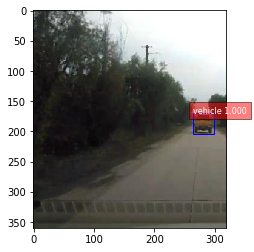

[[264.83328, 170.1666, 298.33343999999994, 204.33348, 0]]


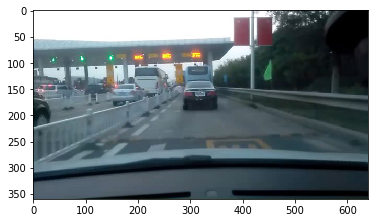

In [11]:
import random

with open(os.path.join(new_train_path, "train.txt"), 'r') as f:
    # get a viusalization 
    rows = f.read().splitlines()
    r = random.randint(0,len(rows))
    imgfile = rows[r]
    print imgfile
    annotation_file = new_train_path + "/" + imgfile.split('/')[-1].split(".")[0] + ".txt"
    annotation = open(annotation_file, 'r')
    annotation_rows = annotation.read().splitlines()
    box = []
    for row in annotation_rows:
        cls, cx, cy, w, h = [float(a) for a in row.split()]
        cls = int(cls)
        dw = 1./width
        dh = 1./height
        xmin = (cx-w/2.)/dw
        xmax = (cx+w/2.)/dw
        ymin = (cy-h/2.)/dh
        ymax = (cy+h/2.)/dh
        box.append([xmin, ymin, xmax, ymax, cls])
    draw(imgfile, box)
    print box
with open(os.path.join(test_path, "val.txt"), 'r') as f:
    # get a viusalization 
    lines = f.read().splitlines()
    r = random.randint(0,len(lines))
    imgfile = lines[r]
    box = []
    draw(imgfile, box)

### Train

In [12]:
import os

os.chdir('/home/ubuntu/capstone4/darknet')
# !nohup ./darknet/darknet detector train darknet/data/ucar.data darknet/cfg/ucar.cfg darknet/darknet19_448.conv.23 > nohup1.out 2>&1&

### Valid

In [13]:
import os
## Use different backup/ucar_xxx.weights to operate validation('valid' in file data/ucar.data)

os.chdir('/home/ubuntu/capstone4/darknet')
!./darknet detector valid data/ucar.data cfg/ucar.cfg backup/ucar_800.weights

results: Using default 'results'
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 max          2 x 2 / 2   416 x 416 x  32   ->   208 x 208 x  32
    2 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    3 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    4 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    5 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    6 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    7 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128
    8 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
    9 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   10 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   11 max          2 x 2 / 2    52 x  52 x 256   ->    26 x  26 x 256
   12 conv    512  3 x 3 / 1    26 x  26 x 256   ->    26 x 